In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

# Load datasets (replace with your actual file paths)
production_df = pd.read_excel('data\observatory_production_aggregated.xlsx')
demand_df = pd.read_excel('data\observatory_demand_aggregated.xlsx')
research_df = pd.read_csv('new_data\location_hydrogeneuroperesearch_summary.csv')
patents_df = pd.read_csv('data\location_patent_data.csv')
fueling_stations_df = pd.read_csv('data\location_hydrogen_fuelling_stations_h2live.csv')
fueling_stations_df_source = pd.read_excel('data\location_hydrogen_fuelling_stations_source.xlsx')
production_costs_df = pd.read_excel('data\observatory_production_cost.xlsx')
vehicels_df = pd.read_excel('data\observatory_hydrogen_vehicel.xlsx')
population_df = pd.read_excel('data\european_population.xlsx')
workers_df = pd.read_csv('data\location_amadeus_mitarbeiter.csv')
companies_df = pd.read_excel('data\location_industry_full_set.xlsx')
valley_df = pd.read_excel('data\location_valleys.xlsx')

# Inspect Data

## Import functions and lists necessary for cleaning

In [2]:
import pycountry
# Function to convert country code to country name
def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    
#These are necessary to harmonize country names used in different datasets
#list of all european countries
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Switzerland', 'Turkey'
]

# Dictionary to map abbreviations to full country names
abbreviation_map = {
    'DE': 'Germany',
    'FR': 'France',
    'NL': 'Netherlands',
    'ES': 'Spain',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'GB': 'United Kingdom',
    'PL': 'Poland',
    'IT': 'Italy',
    'AT': 'Austria',
    'BE': 'Belgium',
    'NO': 'Norway',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'HR': 'Croatia',
    'IS': 'Iceland',
    'PT': 'Portugal',
    'SI': 'Slovenia',
    'HU': 'Hungary',
    'LT': 'Lithuania',
    'EE': 'Estonia'
}

country_mapping = {
    'Czechia': 'Czech Republic',
    'Luxemburg': 'Luxembourg',
    ' United Kingdom': 'United Kingdom',
    'Türkiye': 'Turkey',
    'Slovenija': 'Slovenia',
    'Slovensko': 'Slovakia',
    'Sverige': 'Sweden',
    'Suomi': 'Finland',
    'Österreich': 'Austria',
    'Portugal': 'Portugal',
    'Polska': 'Poland',
    'Norge': 'Norway',
    'Malta': 'Malta',
    'Lietuva': 'Lithuania',
    'Latvija': 'Latvia',
    'Italia': 'Italy',
    'Ireland': 'Ireland',
    'Hrvatska': 'Croatia',
    'Hellas': 'Greece',
    'France': 'France',
    'España': 'Spain',
    'Eesti': 'Estonia',
    'Danmark': 'Denmark',
    'Deutschland': 'Germany',
    'Belgique': 'Belgium',
    'Suisse': 'Switzerland',
    'Nederland': 'Netherlands',
    'ITALY': 'Italy',
    'Czechia': 'Czech Republic',
    'Deutschland': 'Germany',
    'Frankreich': 'France',
    'Niederlande': 'Netherlands',
    'Schweiz': 'Switzerland',
    'Belgien': 'Belgium',
    'Dänemark': 'Denmark',
    'Tschechien': 'Czech Republic',
    'Polen': 'Poland',
    'Luxemburg': 'Luxembourg',
}


Datasets need to be aggregated to country level so that I can actually compare them with each other

# Adapt valley

In [3]:
#count value count main location
valley_df['Main location'].value_counts()

#create a new df with the main location and the number of companies
valley_count = valley_df['Main location'].value_counts().reset_index()
valley_count.columns = ['Country', 'Number of Valleys']
print(valley_count)

#save the df to a csv file
valley_count.to_csv('new_data/valley_count.csv')

           Country  Number of Valleys
0          Germany                 16
1            Spain                  7
2      Netherlands                  6
3         Portugal                  5
4    United States                  4
5            Italy                  4
6           France                  4
7   United Kingdom                  4
8        Australia                  4
9          Denmark                  3
10          Norway                  3
11          Greece                  3
12           China                  3
13          Brazil                  3
14         Ukraine                  2
15         Belgium                  2
16         Finland                  2
17         Romania                  2
18           Chile                  2
19          Poland                  2
20         Austria                  2
21          Sweden                  1
22          Turkey                  1
23         Ireland                  1
24        Thailand                  1
25        Sl

# Adapt population

In [4]:
# Only include the columns TIME and 2023
population_df = population_df[['TIME', '2023']]

#change TIME to Country
population_df = population_df.rename(columns={'TIME': 'Country'})
# Convert the '2023' column to numeric
population_df['2023'] = pd.to_numeric(population_df['2023'], errors='coerce')

# Calculate per million
population_df['per_million'] = population_df['2023'] / 1000000

# Exclude NaN values
population_df = population_df.dropna()

# Display the final DataFrame
print(population_df)

#new csv file
population_df.to_csv('new_data\population_per_million.csv', index=False)

            Country        2023  per_million
0           Belgium  11742796.0    11.742796
1          Bulgaria   6447710.0     6.447710
2    Czech Republic  10827529.0    10.827529
3           Denmark   5932654.0     5.932654
4           Germany  84358845.0    84.358845
5           Estonia   1365884.0     1.365884
6           Ireland   5271395.0     5.271395
7            Greece  10413982.0    10.413982
8             Spain  48085361.0    48.085361
9            France  68172977.0    68.172977
10          Croatia   3850894.0     3.850894
11            Italy  58997201.0    58.997201
12           Cyprus    920701.0     0.920701
13           Latvia   1883008.0     1.883008
14        Lithuania   2857279.0     2.857279
15       Luxembourg    660809.0     0.660809
16          Hungary   9599744.0     9.599744
17            Malta    542051.0     0.542051
18      Netherlands  17811291.0    17.811291
19          Austria   9104772.0     9.104772
20           Poland  36753736.0    36.753736
21        

# Adapt worker per country

Generell Information: Number of workers is highly unreliable, thus we did not include it into the caulculation for anything in the cluster analysis. It can give a glimpse into the importance, but it is not to be considered a good indicator so far in this dataset

In [5]:
workers_df['Worker'] = workers_df["Anzahl der Mitarbeiter \r\nLetztes verf. Jahr"]

#drop the column Anzahl der Mitarbeiter \r\nLetztes verf. Jahr
workers_df = workers_df.drop(columns=['Anzahl der Mitarbeiter \r\nLetztes verf. Jahr'])

# Convert 'Worker' to numeric, setting errors='coerce' to convert 'n.v.' to NaN
workers_df['Worker'] = pd.to_numeric(workers_df['Worker'], errors='coerce')

# Fill NaN values with 0
workers_df['Worker'] = workers_df['Worker'].fillna(0)

# Group by 'Country' and sum the 'Worker' column
worker_sum = workers_df.groupby('Country')['Worker'].sum().reset_index()

print(worker_sum)

            Country   Worker
0           Albania      0.0
1           Austria   1599.0
2           Belarus    447.0
3           Belgium  26342.0
4          Bulgaria   1049.0
5           Croatia    355.0
6            Cyprus      0.0
7    Czech Republic   1957.0
8           Denmark   3232.0
9           Estonia      0.0
10          Finland   3113.0
11           France  84110.0
12          Germany  45192.0
13           Greece    442.0
14          Hungary     91.0
15          Iceland     29.0
16          Ireland    307.0
17            Italy  12908.0
18        Lithuania     16.0
19       Luxembourg      0.0
20            Malta      0.0
21      Netherlands   8382.0
22  North Macedonia     24.0
23           Norway   1654.0
24           Poland   7652.0
25         Portugal    459.0
26          Romania    513.0
27           Russia  18434.0
28           Serbia    378.0
29         Slovakia    153.0
30         Slovenia   2040.0
31            Spain   5645.0
32           Sweden   2971.0
33      Switze

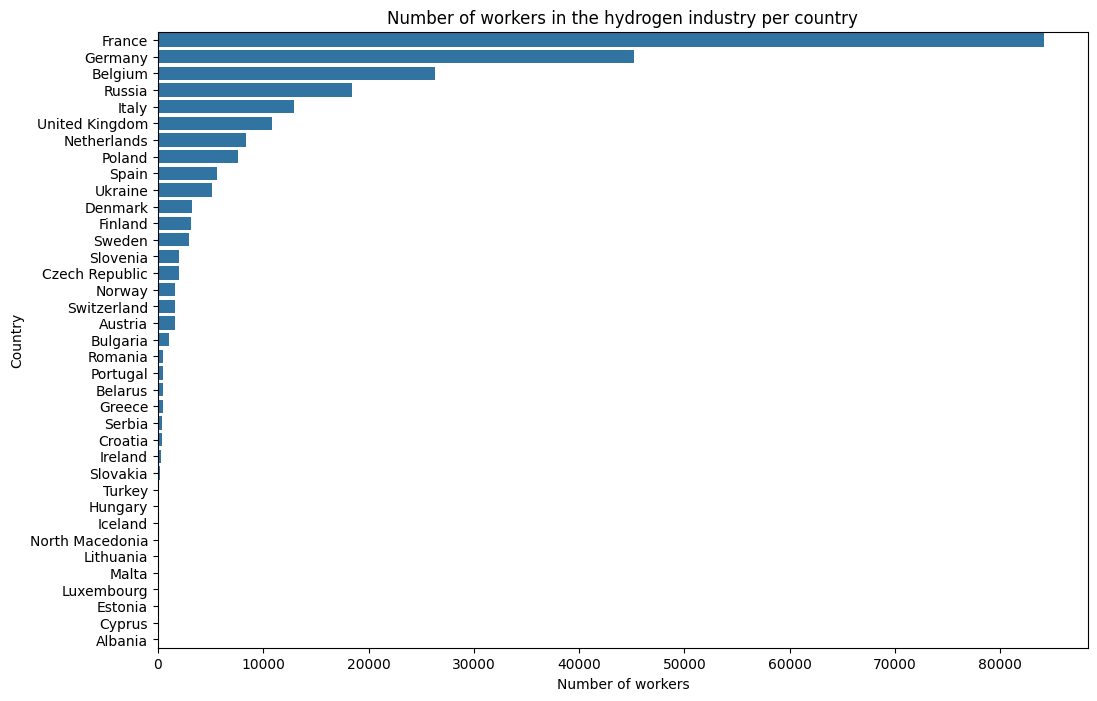

In [6]:
#order the countries by the number of workers
worker_sum = worker_sum.sort_values(by='Worker', ascending=False)

#create a plot of the number of workers in the hydrogen industry per country
plt.figure(figsize=(12, 8))
sns.barplot(data=worker_sum, x='Worker', y='Country')
plt.title('Number of workers in the hydrogen industry per country')
plt.xlabel('Number of workers')
plt.ylabel('Country')
plt.show()

#new csv file
worker_sum.to_csv('new_data\workers_per_country.csv', index=False)


In [7]:
worker_sum


,Country,Worker
11,France,84110.0
12,Germany,45192.0
3,Belgium,26342.0
27,Russia,18434.0
17,Italy,12908.0
36,United Kingdom,10847.0
21,Netherlands,8382.0
24,Poland,7652.0
31,Spain,5645.0
35,Ukraine,5178.0


In [8]:
companies_df

,Lat,Lon,Name,Full Address,Address,ZIP,City,Country,Source
0,54.554813,-5.946117,ENERGIA HYDROGEN LIMITED,"GREENWOOD HOUSE, 64 NEWFORGE LANE, BT9 5NF, Be...","GREENWOOD HOUSE, 64 NEWFORGE LANE",BT9 5NF,BELFAST,United Kingdom,Amadeus
1,41.519069,-4.717080,CARTIF Foundation,"Av. Francisco Vallés, 4, 47151 Boecillo, Valla...",NaN,NaN,NaN,Spain,Hydrogen Europe Research
2,41.173800,-8.658730,CATIM - Portuguese Technological Center for th...,"Rua dos Plátanos, 197, 4100-414 - Porto",NaN,NaN,NaN,Portugal,Hydrogen Europe Research
3,38.048404,23.809212,SOL HELLAS Α.Ε.,"ΒΟΡ. ΗΠΕΊΡΟΥ 74-76 & ΚΟΝΊΤΣΗΣ, 15125, Αττική, ...",ΒΟΡ. ΗΠΕΊΡΟΥ 74-76 & ΚΟΝΊΤΣΗΣ,15125,ΜΑΡΟΎΣΙ,Greece,Amadeus
4,71.042765,27.845717,FINNMARK COD AS,"RAET 9, 9770, Gamvik, Norwegen",RAET 9,9770,MEHAMN,Norway,Amadeus
...,...,...,...,...,...,...,...,...,...
4236,28.158604,-15.422467,QUIMICAS MORALES SL,"CALLE MISIONES, 11, 35008, Las Palmas, Spanien","CALLE MISIONES, 11",35008,LAS PALMAS DE GRAN CANARIA,Spain,Amadeus
4237,28.117971,-15.493484,"CANALUZ INFINITA, SOCIEDAD LIMITADA.","CALLE PORTUGAL, 14 4 A, 35010, Las Palmas, Spa...","CALLE PORTUGAL, 14 4 A",35010,LAS PALMAS DE GRAN CANARIA,Spain,Amadeus
4238,28.117423,-15.422188,"WATER2KW, SOCIEDAD LIMITADA.","CALLE CARVAJAL, 12 PISO 6 A, 35004, Las Palmas...","CALLE CARVAJAL, 12 PISO 6 A",35004,LAS PALMAS DE GRAN CANARIA,Spain,Amadeus
4239,27.991930,-15.368714,Plocan - Oceanic Platform of the Canary Islands,"Carretera de Taliarte, s/n, 35214 Telde, Las P...",NaN,NaN,NaN,Spain,Hydrogen Europe Research


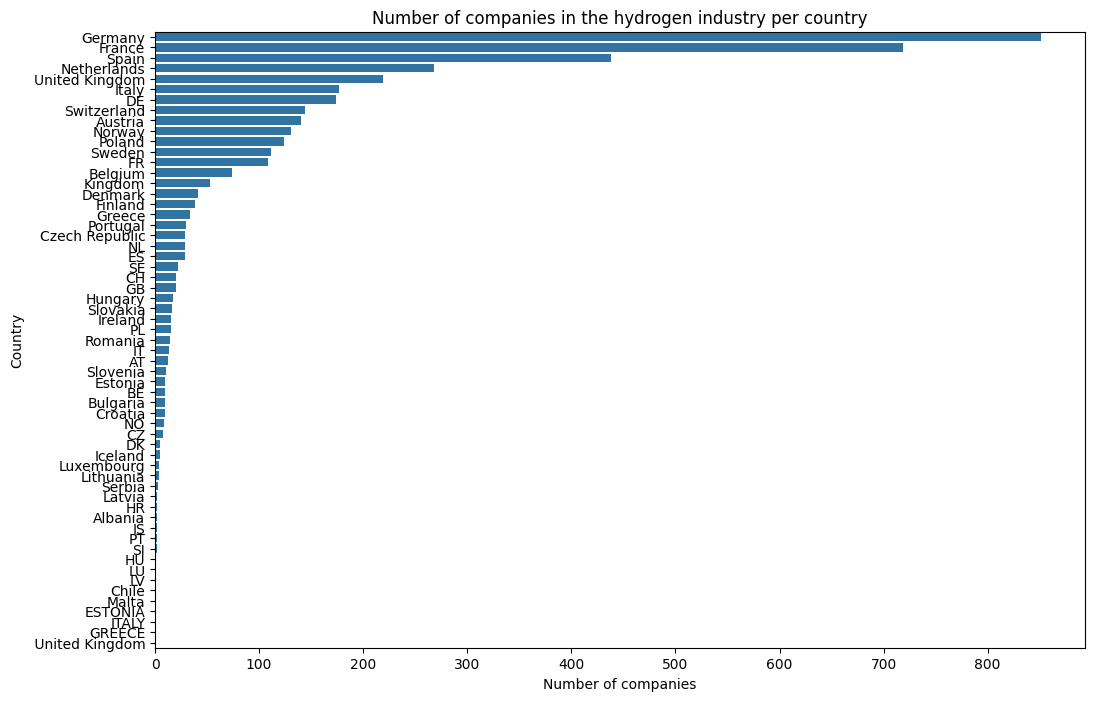

In [9]:
#count the number of times countries appear in the dataset
companies_df['Country'].value_counts()

#group by 'Country' and count the number of companies
company_count = companies_df.groupby('Country')['Name'].count().reset_index()

#change Name to Number of Companies
company_count = company_count.rename(columns={'Name': 'Number of Companies'})

#sort the values by the number of companies

company_count = company_count.sort_values(by='Number of Companies', ascending=False)

#create a plot of the number of companies in the hydrogen industry per country

plt.figure(figsize=(12, 8))
sns.barplot(data=company_count, x='Number of Companies', y='Country')
plt.title('Number of companies in the hydrogen industry per country')
plt.xlabel('Number of companies')
plt.ylabel('Country')

#new csv file
company_count.to_csv('new_data\companies_per_country.csv', index=False)

In [10]:
company_count

,Country,Number of Companies
23,Germany,851
20,France,719
55,Spain,438
43,Netherlands,268
58,United Kingdom,219
33,Italy,177
12,DE,174
57,Switzerland,144
3,Austria,140
44,Norway,131


In [11]:

# Update the Country column
company_count['Country'] = company_count['Country'].apply(get_country_name)


In [12]:
company_count

,Country,Number of Companies
23,Germany,851
20,France,719
55,Spain,438
43,Netherlands,268
58,United Kingdom,219
33,Italy,177
12,Germany,174
57,Switzerland,144
3,Austria,140
44,Norway,131


In [13]:
# Remove any possible duplicates resulting from replacements
company_count = company_count.groupby('Country', as_index=False).sum()

#export to csv
company_count.to_csv('new_data\location_industry_V13.csv', index=False)

# Cleaning Fuelling stations

In [14]:
import pandas as pd

# Replace German country names with English equivalents
fueling_stations_df['Country'] = fueling_stations_df['Country'].replace(country_mapping)
get_country_name
# Summarize the number of rows per country
print(fueling_stations_df["Country"].value_counts())
#create a new file with the number of rows per country and name the columns "Country" and "Number Stations"
fueling_stations_df["Country"].value_counts().reset_index().rename(columns={"Country":"Country", "count":"Number Stations"}).to_csv("new_data/fueling_stations_per_country_old.csv", index=False)

fueling_stations_df = pd.read_csv('new_data/fueling_stations_per_country_old.csv')
fueling_stations_df

Country
Germany           98
France            30
Netherlands       22
Switzerland       12
United Kingdom     9
Belgium            9
Denmark            6
Austria            5
Norway             4
Sweden             4
Spain              3
Czech Republic     2
Poland             2
Italy              1
Iceland            1
Luxembourg         1
Name: count, dtype: int64


,Country,Number Stations
0,Germany,98
1,France,30
2,Netherlands,22
3,Switzerland,12
4,United Kingdom,9
5,Belgium,9
6,Denmark,6
7,Austria,5
8,Norway,4
9,Sweden,4


In [15]:
fueling_stations_df_source['Country'] = fueling_stations_df_source['Country'].apply(get_country_name)


In [16]:
country_counts = fueling_stations_df_source['Country'].value_counts().reset_index().rename(columns={"Country":"Country", "count":"Number Stations"})
country_counts
# Save to CSV
country_counts.to_csv("new_data/fueling_stations_per_country_source.csv", index=False)
# Read back the CSV
fueling_stations_df = pd.read_csv('new_data/fueling_stations_per_country_source.csv')

print(fueling_stations_df)

           Country  Number Stations
0          Germany              174
1           France              109
2      Netherlands               29
3            Spain               29
4           Sweden               22
5      Switzerland               20
6   United Kingdom               20
7           Poland               15
8            Italy               13
9          Austria               12
10         Belgium               10
11          Norway                9
12         Czechia                8
13         Denmark                5
14        Portugal                2
15        Slovenia                2
16         Iceland                2
17         Croatia                2
18          Latvia                1
19      Luxembourg                1
20         Hungary                1


# Cleaning Production Dataframe

In [17]:
#summarize the values of Output for every country in production_df
#sort by the values of Output

print(production_df.groupby("Country")["Output T/year"].sum().sort_values(ascending=False))

#save the summarized values of Output for every country in production_df to a new file
production_df.groupby("Country")["Output T/year"].sum().sort_values(ascending=False).to_csv("new_data/production_per_country_aggregated.csv")
production_df = pd.read_csv('new_data/production_per_country_aggregated.csv')


Country
Germany           1.743512e+06
Netherlands       9.752337e+05
Poland            7.846371e+05
Spain             6.144706e+05
Italy             6.079131e+05
United Kingdom    5.691355e+05
France            5.528228e+05
Belgium           4.112296e+05
Greece            3.265575e+05
Hungary           1.880052e+05
Finland           1.764358e+05
Sweden            1.753669e+05
Norway            1.576096e+05
Lithuania         1.436869e+05
Romania           1.343347e+05
Bulgaria          1.211730e+05
Austria           1.154723e+05
Portugal          1.062848e+05
Slovakia          1.055977e+05
Czechia           1.038661e+05
Croatia           6.231680e+04
Denmark           2.495285e+04
Switzerland       2.054980e+04
Ireland           7.864366e+03
Slovenia          1.846500e+03
Iceland           7.530294e+02
Estonia           1.685887e+01
Name: Output T/year, dtype: float64


# Clean the demand Dataframe

In [18]:
demand_df

#summaries the values of Demand for every country in demand_df
#sort by the values of Demand
print(demand_df.groupby("Country")["Total consumption"].sum().sort_values(ascending=False))

#save the summarized values of Demand for every country in demand_df to a new file
demand_df.groupby("Country")["Total consumption"].sum().sort_values(ascending=False).to_csv("new_data/demand_per_country_aggregated.csv")
demand_df = pd.read_csv('new_data/demand_per_country_aggregated.csv')

Country
Germany           1.736609e+06
Netherlands       9.840434e+05
Poland            7.840205e+05
Spain             6.118314e+05
Italy             6.077423e+05
United Kingdom    5.689877e+05
France            5.497484e+05
Belgium           3.781651e+05
Greece            3.265357e+05
Hungary           1.878715e+05
Finland           1.763571e+05
Sweden            1.746915e+05
Norway            1.567130e+05
Lithuania         1.436869e+05
Romania           1.337803e+05
Bulgaria          1.211920e+05
Austria           1.161150e+05
Slovakia          1.053859e+05
Czechia           1.041095e+05
Portugal          1.033458e+05
Croatia           6.233575e+04
Denmark           2.528949e+04
Switzerland       2.054980e+04
Ireland           8.226722e+03
Slovenia          1.809405e+03
Iceland           7.530294e+02
Luxemburg         5.749602e+02
Latvia            6.717977e+01
Estonia           1.685887e+01
Name: Total consumption, dtype: float64


# Clean production cost df

In [19]:
production_costs_df

,Country,Technology,Cost,Value (€/kg),Year
0,Austria,Grid electrolysis,CAPEX,1.189626,2022
1,Belgium,Grid electrolysis,CAPEX,1.189626,2022
2,Bulgaria,Grid electrolysis,CAPEX,1.189626,2022
3,Croatia,Grid electrolysis,CAPEX,1.189626,2022
4,Czechia,Grid electrolysis,CAPEX,1.189626,2022
...,...,...,...,...,...
505,Slovenia,SMR,Other OPEX,0.091633,2022
506,Spain,SMR,Other OPEX,0.091633,2022
507,Sweden,SMR,Other OPEX,0.091633,2022
508,Switzerland,SMR,Other OPEX,NaN,2022


In [20]:
#summarize the Value (€/Kg) for every country in production_costs_df for the year 2022
#sort by the values of Value (€/Kg) for Technology type
# Filter for "renewable hydrogen" technology in 2022
filtered_df = production_costs_df[(production_costs_df["Year"] == 2022) & (production_costs_df["Technology"] == "Renewable hydrogen directly connected to a renewable electricity generation source")]

# Summarize the Value (€/Kg) for every country in the filtered DataFrame
summary = filtered_df.groupby("Country")["Value (€/kg)"].sum().sort_values(ascending=False)

# Print the summarized values
print(summary)

# Save the summarized values to a new file
summary.to_csv("new_data/production_costs_per_country.csv")

# Load the summarized values into a new DataFrame
production_costs_df = pd.read_csv('new_data/production_costs_per_country.csv')

Country
Luxembourg        9.595711
Slovakia          9.316620
Croatia           8.589821
Slovenia          8.385173
Hungary           7.820671
Italy             7.792785
Latvia            7.779571
Romania           7.715760
Germany           7.633407
Lithuania         7.356734
Belgium           7.336292
Denmark           7.259122
Finland           6.961202
Norway            6.884075
France            6.807338
Poland            6.778285
Czechia           6.686988
Estonia           6.587222
Cyprus            6.385281
Netherlands       6.245959
Sweden            6.093127
Malta             5.800792
Spain             5.767289
United Kingdom    5.763128
Austria           5.693330
Ireland           5.477490
Portugal          5.198879
Greece            5.177098
Bulgaria          4.176841
Switzerland       0.000000
Name: Value (€/kg), dtype: float64


# Clean vehicle data

In [21]:
vehicels_df
#summarize the values of Number of vehicles for every country in vehicels_df for the year 2022
#sort by the values of Number of vehicles
print(vehicels_df[vehicels_df["Year"] == 2022].groupby("Country")["FCEV Fleet"].sum().sort_values(ascending=False))

#save the summarized values of Number of vehicles for every country in vehicels_df for the year 2022 to a new file
vehicels_df[vehicels_df["Year"] == 2022].groupby("Country")["FCEV Fleet"].sum().sort_values(ascending=False).to_csv("new_data/vehicles_per_country.csv")
vehicels_df = pd.read_csv('new_data/vehicles_per_country.csv')
#total sum of the Number of vehicles for all countries

Country
Germany           2233
France             863
Netherlands        693
United Kingdom     351
Switzerland        349
Norway             273
Denmark            234
Poland             125
Belgium            110
Italy               69
Sweden              67
Austria             62
Spain               29
Iceland             27
Czech Republic      12
Luxembourg          10
Latvia              10
Portugal             5
Slovakia             3
Finland              2
Estonia              2
Lithuania            1
Name: FCEV Fleet, dtype: int64


In [22]:
print(vehicels_df["FCEV Fleet"].sum())


5530


# Clean patent Data

In [23]:
# Group by 'Jurisdiction' and sum the patent numbers
print(patents_df)

#only include countries in the european_countries list
patents_df_new = patents_df[patents_df['Country'].isin(european_countries)]
patents_df_new

#drop the column 'Jurisdiction'
patents_df_new = patents_df_new.drop(columns=['Jurisdiction'])

#rename count to 'Number of Patents'
patents_df_new = patents_df_new.rename(columns={'Count': 'Number of Patents'})

#save in a new file
patents_df_new.to_csv('new_data/patents_per_country.csv', index=False)


     Count Jurisdiction           Country
0   301905           US     United States
1    95468           EP  European Patents
2    87232           CN             China
3    78066           WO         WO - WIPO
4    35261           JP             Japan
..     ...          ...               ...
69       1           EE           Estonia
70       1           IS           Iceland
71       1           MN          Mongolia
72       1           OA      OAPI Patents
73       1           PE              Peru

[74 rows x 3 columns]


# Inspection

In [24]:
#let me inspect all the dataframes
print(production_df.head())
print(demand_df.head())
print(research_df.head())
print(patents_df.head())
print(fueling_stations_df.head())
print(production_costs_df.head())
print(vehicels_df.head())
print(population_df.head())
print(worker_sum.head())
print(company_count.head())
print(valley_count.head())
print(patents_df_new.head())

#check all dataframes if they contain the column "Country"

print("production_df: ", "Country" in production_df.columns)
print("demand_df: ", "Country" in demand_df.columns)
print("research_df: ", "Country" in research_df.columns)
print("patents_df: ", "Country" in patents_df_new.columns)
print("fueling_stations_df: ", "Country" in fueling_stations_df.columns)
print("production_costs_df: ", "Country" in production_costs_df.columns)
print("vehicels_df: ", "Country" in vehicels_df.columns)
print("population_df: ", "Country" in population_df.columns)
print("workers_df: ", "Country" in worker_sum.columns)
print("companies_df: ", "Country" in company_count.columns)
print("valley_df: ", "Country" in valley_count.columns)



       Country  Output T/year
0      Germany   1.743512e+06
1  Netherlands   9.752337e+05
2       Poland   7.846371e+05
3        Spain   6.144706e+05
4        Italy   6.079131e+05
       Country  Total consumption
0      Germany       1.736609e+06
1  Netherlands       9.840434e+05
2       Poland       7.840205e+05
3        Spain       6.118314e+05
4        Italy       6.077423e+05
   Country  Count Research
0    Spain              27
1    Italy              21
2  Germany              18
3   France              10
4   Poland               8
    Count Jurisdiction           Country
0  301905           US     United States
1   95468           EP  European Patents
2   87232           CN             China
3   78066           WO         WO - WIPO
4   35261           JP             Japan
       Country  Number Stations
0      Germany              174
1       France              109
2  Netherlands               29
3        Spain               29
4       Sweden               22
      Country  V

# Merge Data

In [25]:
# Merge datasets on 'Country' key using outer join
merged_df = production_df.merge(demand_df, on='Country', how='outer') \
                         .merge(research_df, on='Country', how='outer') \
                         .merge(patents_df_new, on='Country', how='outer') \
                         .merge(fueling_stations_df, on='Country', how='outer') \
                         .merge(production_costs_df, on='Country', how='outer') \
                         .merge(vehicels_df, on='Country', how='outer') \
                         .merge(population_df, on='Country', how='outer') \
                        .merge(worker_sum, on='Country', how='outer') \
                        .merge(company_count, on='Country', how='outer') \
                        .merge(valley_count, on='Country', how='outer')

In [26]:
# Replace different country name variations with the standardized names
merged_df['Country'] = merged_df['Country'].replace(country_mapping)

merged_df['Country'].value_counts()



Country
United Kingdom    2
Luxembourg        2
Italy             2
Czech Republic    2
Thailand          1
                 ..
Germany           1
Greece            1
Hungary           1
Iceland           1
United States     1
Name: count, Length: 63, dtype: int64

In [27]:
# Filter out non-European countries
merged_df = merged_df[merged_df['Country'].isin(european_countries)]

# Aggregate values for each country
merged_df_new = merged_df.groupby('Country').sum().reset_index()
df = merged_df_new.copy()

merged_df_new
merged_df_new.to_csv('merged_data/merged_data.csv', index=False)

In [28]:
per_million_df = pd.DataFrame()  # Create an empty DataFrame to store per million capita values
column = ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Number of Patents', 'Count Research']
for column in column:
    if merged_df_new[column].dtype == 'int64' or merged_df_new[column].dtype == 'float64':
        per_million_df[column] = merged_df_new[column] / merged_df_new['per_million']  # Calculate per million values
    else:
        per_million_df[column] = merged_df_new[column]  # Non-numeric columns remain unchanged


#add the columns 'Value (€/kg)' and 'Country' to the new dataframe
per_million_df['Value (€/kg)'] = merged_df_new['Value (€/kg)']
per_million_df['Country'] = merged_df_new['Country']
per_million_df.to_csv('merged_data/merged_per_million.csv', index=False)

In [29]:
per_million_df

,Output T/year,Total consumption,Number Stations,FCEV Fleet,Worker,Number of Companies,Number of Valleys,Number of Patents,Count Research,Value (€/kg),Country
0,12682.617893,12753.204588,1.317990,6.809616,175.622190,16.694542,0.219665,7.798109,0.439330,5.693330,Austria
1,35019.737601,32204.006858,0.851586,9.367445,2243.247690,7.153322,0.170317,3.576661,0.510952,7.336292,Belgium
2,18793.191001,18796.138133,0.000000,0.000000,162.693421,1.550938,0.000000,20.162197,0.310188,4.176841,Bulgaria
3,16182.424930,16187.345053,0.519360,0.000000,92.186386,3.116160,0.000000,5.712959,0.259680,8.589821,Croatia
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.385281,Cyprus
5,9592.780982,9615.263401,0.738857,1.108286,180.742993,3.417216,0.000000,22.627508,0.092357,6.686988,Czech Republic
6,4206.017425,4262.760965,0.842793,39.442718,544.781476,7.753697,0.505676,19.552800,0.842793,7.259122,Denmark
7,12.342826,12.342826,0.000000,1.464253,0.000000,7.321266,0.732127,0.732127,0.732127,6.587222,Estonia
8,31710.413241,31696.273208,0.000000,0.359456,559.492593,6.829656,0.359456,14.378223,0.898639,6.961202,Finland
9,8109.119903,8064.022372,1.598874,12.658975,1233.773318,12.145575,0.058674,16.091420,0.146686,6.807338,France


# Create a df for every country using the indexes

## Prepare Carbon intensity for analysis

In [30]:
carbon = pd.read_csv("index/carbon_intensity.csv")
competitiveness = pd.read_csv("index/competitiveness_index.csv")
renewable = pd.read_csv("index/renewable_country.csv")

Carbon intensity is a measure of carbon dioxide and other greenhouse gases (CO2e) per unit of activity, like generating a product.

the IMD World Competitiveness Ranking was created, in a bid to provide actionable data analysis on economies, regions and sub-regions according to how they optimize their individual competencies in order to achieve long-term value creation for their people. It provides benchmarking and exposes trends, using both statistics and real-world survey data.

Share of energy consumption from renewable sources in Europe

In [31]:
#Only take year 2022
carbon = carbon[carbon["Year:year"]==2022]
#Rename to "Year"
carbon = carbon.rename(columns={"Year:year": "Year"})
carbon = carbon.rename(columns={"Member State:text": "Country"})
carbon = carbon.rename(columns={"Greenhouse gas (GHG) emission intensity:number.1": "GHG intensity"})

#Only keep the columns that are needed
carbon = carbon[["Year", "Country", "GHG intensity"]]

#Competitiveness needs no cleaning since it is already structured correctly
#renewable

renewable = renewable.rename(columns={"Renewable energy share 2022:number": "Re_share"})
renewable = renewable.rename(columns={"Country:text": "Country"})
renewable = renewable[["Country", "Re_share"]]


In [32]:
#list of countries
print(renewable)
print(carbon)
print(competitiveness)

        Country  Re_share
0        Sweden     66.00
1       Finland     47.89
2        Latvia     43.32
3       Denmark     41.60
4       Estonia     38.47
5      Portugal     34.68
6       Austria     33.76
7     Lithuania     29.60
8       Croatia     27.92
9      Slovenia     25.00
10      Romania     24.14
11        EU-27     23.02
12       Greece     22.68
13        Spain     22.12
14      Germany     20.80
15       France     20.26
16       Cyprus     19.43
17     Bulgaria     19.10
18        Italy     19.01
19      Czechia     18.20
20     Slovakia     17.50
21       Poland     16.88
22      Hungary     15.19
23  Netherlands     14.97
24   Luxembourg     14.36
25      Belgium     13.76
26        Malta     13.40
27      Ireland     13.11
28          NaN       NaN
29      Iceland       NaN
30       Norway     75.82
     Year      Country  GHG intensity
34   2022       Sweden            7.0
67   2022   Luxembourg           52.0
100  2022      Finland           66.0
133  2022       

In [33]:
#Merge all three indexes
index = pd.merge(carbon, competitiveness, on="Country")
index = pd.merge(index, renewable, on="Country")
index = index.rename(columns={"Score": "Competitiveness"})
index = index[[ "Country", "GHG intensity", "Competitiveness", "Re_share"]]
index

,Country,GHG intensity,Competitiveness,Re_share
0,Sweden,7.0,90.3,66.00
1,Luxembourg,52.0,73.7,14.36
2,Finland,66.0,80.3,47.89
3,France,68.0,69.7,20.26
4,Latvia,86.0,59.1,43.32
5,Austria,96.0,72.1,33.76
6,Denmark,103.0,97.1,41.60
7,Croatia,133.0,52.8,27.92
8,Belgium,145.0,77.9,13.76
9,Portugal,173.0,65.1,34.68


In [34]:
#merge them with both merged_df and per_million_df, but make sure that all countries are still in the dataset
merged_df_index = pd.merge(merged_df_new, index, on="Country", how="outer")
per_million_df_index = pd.merge(per_million_df, index, on="Country", how="outer")

In [35]:
#save them to a new csv file
merged_df_index.to_csv('merged_data/merged_data_index.csv', index=True)
per_million_df_index.to_csv('merged_data/merged_per_million_index.csv', index = True)